[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/210-Amazon-Part-I-II.ipynb)

# Tabular: Amazon Part I+II

## Data Familiarization

You're working with real Amazon India Female fashion sales data from their Q2 2022 MRP which you can download [here](https://raw.githubusercontent.com/ciri/iese-dsfb-mim/main/resources/tabular/AmazonSalesReport.csv). This dataset provides detailed insights into Amazon sales data, including SKU, product design, category, size, pricing, and fulfillment details. It is useful for analyzing sales performance and optimizing product profitability. Before doing any analysis, you need to understand what data you're looking at:

* What does each row represent?
* What kind of columns are available?
* Are there missing values?

First step: always **look at your data**. Use `.head()` to see a sample, `.info()` to understand the structure, and `.describe()` for numeric summaries. We'll answer those questions using a few simple commands in pandas.

Some datasets also come with a `data card`, here's the one for this dataset:


| **Variable**       | **Description**                                               | **Type**    |
|--------------------|---------------------------------------------------------------|-------------|
| `category`         | Type of product (e.g., kurta, set, top)                       | String      |
| `size`             | Size of the product                                           | String      |
| `date`             | Date of the sale                                              | Date        |
| `status`           | Status of the order (e.g., Shipped, Cancelled)                | String      |
| `fulfilment`       | Who fulfilled the order (Amazon or Merchant)                  | String      |
| `style`            | Style identifier of the product                               | String      |
| `sku`              | Stock Keeping Unit, unique product ID                         | String      |
| `asin`             | Amazon Standard Identification Number                         | String      |
| `courier_status`   | Current status of the shipping courier                        | String      |
| `qty`              | Quantity of items ordered                                     | Integer     |
| `amount`           | Sale amount per item (in INR)                                          | Float       |
| `b2b`              | Whether the customer is a business                            | Boolean     |
| `currency`         | Currency used for the transaction (usually INR)               | String      |


In [65]:
import pandas as pd

#### If you have a local copy:
df = pd.read_csv('../resources/tabular/AmazonSalesReport.csv')

### Download it:
# df = pd.read_csv('https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/tabular/AmazonSalesReport.csv')

/tmp/ipykernel_1861158/3844668741.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../resources/tabular/AmazonSalesReport.csv')


You may be getting a warning. When pandas loads a CSV, it tries to infer the data type of each column (int, float, object, etc.). If a column has both numbers and text, pandas gets confused. Column 23 (24th column, likely 'fulfilled-by') has mixed types - probably some strings like "Easy Ship" and some missing values (NaN) or unexpected values like False.

In [66]:
df.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,base-SKU,SKU,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389,SET389-KR-NP-S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781,JNE3781-KR-XXXL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371,JNE3371-KR-XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [67]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,126514.000000,126514.000000,118728.000000,126481.000000
mean,64474.154813,0.902691,661.099273,464452.737217
std,37243.711860,0.315949,268.982377,191271.827748
min,0.000000,0.000000,0.000000,110001.000000
25%,32171.250000,1.000000,458.000000,382455.000000
50%,64508.500000,1.000000,621.450000,500034.000000
75%,96728.750000,1.000000,788.000000,600028.000000
max,128974.000000,15.000000,5584.000000,989898.000000


### 🧹 Data Cleaning

Before we can trust or analyze this data, we need to clean it. That means:

* Standardize column names so they’re consistent
* Drop unnecessary columns (like Excel export leftovers)
* Handle missing values in a simple, safe way

**Drop irrelevant columns**

In [68]:
df.columns # at the end there's a weird one, likely someone added one comma too many or had a value in excel at the end of the row
           # we also don't need this index

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'base-SKU', 'SKU', 'Category', 'Size',
       'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [69]:
df = df.drop(columns=['Unnamed: 22', 'index'])

**Rename columns**

Let's clean up some column names, ideally in python no spaces. Let's make it all very consistent.

In [70]:
# Rename confusing column names for clarity
df = df.rename(columns={
    'Order ID': 'order_id',
    'Date': 'date',
    'Status': 'status',
    'Fulfilment': 'fulfilment',
    'Sales Channel ': 'sales_channel',
    'ship-service-level': 'ship_service_level',
    'Style': 'style',
    'Category': 'category',
    'Size': 'size',
    'Courier Status': 'courier_status',
    'Qty': 'qty',
    'currency': 'currency',
    'Amount': 'amount',
    'ship-city': 'ship_city',
    'ship-state': 'ship_state',
    'ship-postal-code': 'ship_postal_code',
    'ship-country': 'ship_country',
    'promotion-ids': 'promotion_ids',
    'fulfilled-by': 'fulfilled_by',
})
df.head(3)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,base-SKU,SKU,category,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN


**Handle missing values**

Are there missing values?

In [71]:
df.isna().sum()

order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
base-SKU                  0
SKU                       0
category                  0
size                      0
ASIN                      0
courier_status         6866
qty                       0
currency               7786
amount                 7786
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         47530
B2B                       0
fulfilled_by          88023
dtype: int64

Note that `df.isna()` is a data frame of the same shape as `df`, whose terms have type `bool`. With `sum`, we get the number of `True` values per column.

Missing values are denoted by `NaN` in Pandas. When a Pandas object is built, both plain Python’s `None` and NumPy’s `nan` are taken as NaN. Since `np.nan` has type `float`, a numeric series containing NaN values
gets type float.

Three useful Pandas methods related to missing values, which can be applied to both series and data frames, are:
* `isna` returns a Boolean mask indicating which terms are missing.
* `fillna` is used for replacing `NaN`’s by a fixed value, set by the user.
* `dropna` returns the same data frame minus the rows that contain at least one missing value. If a list of columns is specified, the missing values are searched only for those columns.

For our case, let’s apply the following business rules:

- If *amount* or *currency* is missing, drop the row (we can't use it for financial analysis).
- If *courier status* is missing, fill it with `"Unknown"`.

The rest we leave as is.

In [72]:
df = df.dropna(subset=['amount', 'currency']).copy()
df['courier_status'] = df['courier_status'].fillna('Unknown')

**Remove Duplicates**

There are two useful Pandas functions for managing duplicates:

* `drop_duplicates` drops the duplicated entries (in a series) or the duplicated rows (in a data frame).
* `duplicated` returns a Boolean series indicating which entries (for a series) or which rows (for a data
frame) are duplicated.

In [73]:
df.duplicated().sum()

3

In [74]:
print('Before dropping duplicates:', df.shape)
df = df.drop_duplicates()
print('After dropping duplicates:', df.shape)

Before dropping duplicates: (118728, 23)
After dropping duplicates: (118725, 23)


**Any other final conversion**

Since I am not too familiar (intuitively) with INR, I prefer to convert to Euro.

In [75]:
exchange_rate = 0.0118 # In 2022
df['amount_eu'] = (df['amount'] * exchange_rate).round(2)

It's good practice to save the dataframe after preprocessing this allows you to continue with a clean dataset going forward. Make sure you specify a path that makes sense to you. When in doubt you can just use `'./Amazon-cleaned.csv'`

In [76]:
df.to_csv('../resources/tabular/Amazon-cleaned.csv', index=False)

## Exploratory Analysis

In [77]:
df = pd.read_csv('../resources/tabular/Amazon-cleaned.csv')
df.head(3)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,base-SKU,SKU,category,...,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by,amount_eu
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,7.64
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4.79
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,3.88


## Revenue Trend over Time

### Revenue v.s. Price

**You try it**

Figure out the meaning of `qty` and `amount_eu`, do we have a `unit_price` here? Revenue per order? Let's rename these columns for clarity to `'quantity'`, `'unit_price'`, and `'revenue'`.

Anything weird going on otherwise with the fields?

Hint: use the `describe()` function or look at the min/max.

### Adding time

Pandas has powerful tools to help you work with dates - but dates start as plain text ("strings"), which can't be analyzed or sorted properly.

So first, we **convert the `date` column** into a proper **datetime object**. Once we do that, we unlock a *lot* of cool tricks. Here's the flow:


| Concept              | What it Does                                                              |
|----------------------|---------------------------------------------------------------------------|
| `pd.to_datetime()`   | Converts text into a proper date format                                   |
| `.dt`                | A special "datetime accessor" in pandas - lets you pull out month, day, etc. |
| `.dt.month_name()` | Extracts the **month name** (e.g., "April") from a full date              |

In [78]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_1861158/3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [79]:
df['month'] = df.date.dt.month_name()

To report sales per month we need to do a groupby.

Suppose that you are interested in the average price per room type. You can get this by applying `groupby()` which works as follows:

<center>
<img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/pandas_groupby.png' width='100%'>
</center>


This method groups the rows according to one or more **grouping variables**. Here, you specify `groupby(by='room_type')`. 

Next, you select the columns to be aggregated, which, here would be just `price`. Finally, you specify the **aggregation function**. Having only the mean, you can do it just by adding `mean()` or by specifying `.agg('mean')`. The method `round()` works as you would expect it to.

In [80]:
df['revenue'] = df['amount_eu']

monthly_revenue = df.groupby('month')[['revenue']].sum()
monthly_revenue

,revenue
month,
April,340310.95
June,276409.03
May,309464.06


In [81]:
# Let's order the months correctly and plot
# We will also drop March as its clearly incomplete
month_order = ['April', 'May', 'June']
monthly_revenue = monthly_revenue.loc[month_order]
monthly_revenue

,revenue
month,
April,340310.95
May,309464.06
June,276409.03


In [82]:
# Calculate average revenue over last 3 months
# and how much below/above average we are
avg_q2_revenue = monthly_revenue['revenue'].mean()
avg_q2_revenue

monthly_revenue['% below avg'] = round((1 - monthly_revenue['revenue'] / avg_q2_revenue) * 100, 1)
monthly_revenue

,revenue,% below avg
month,,
April,340310.95,-10.2
May,309464.06,-0.2
June,276409.03,10.5


Charts are often more persuasive than tables. We will not waste time teaching this as you can ask LLM's to provide this to you. You can "vibe"-chart your way to great visualizations, just make sure that your dataframe above is 100% correct!

/tmp/ipykernel_1861158/1770982019.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(range(0, 41, 5)))


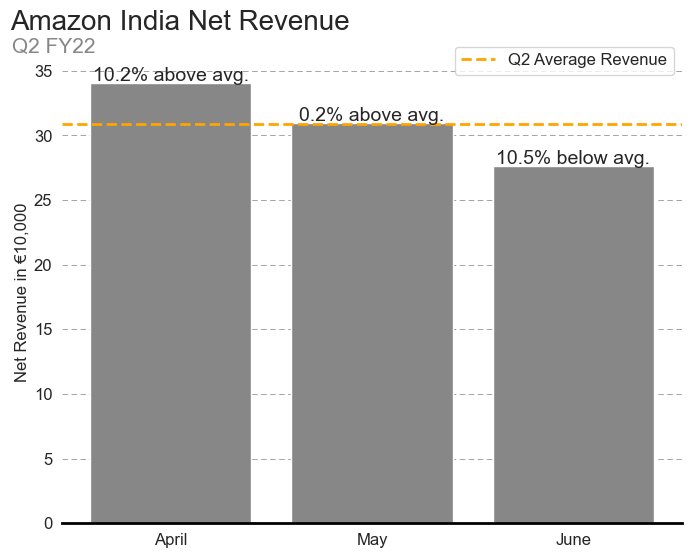

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Set-up data
monthly_revenue = df.groupby('month')[['revenue']].sum()

monthly_revenue = monthly_revenue.T[['April','May','June']].T
avg_q2_revenue = monthly_revenue['revenue'].mean()
monthly_revenue['% below avg'] = round((1 - monthly_revenue['revenue'] / avg_q2_revenue) * 100, 1)

# Plot bars
bars = ax.bar(monthly_revenue.index, monthly_revenue['revenue'], color='#878787')

# Add horizontal line for average
ax.axhline(avg_q2_revenue, linestyle='--', color='orange', linewidth=2, label='Q2 Average Revenue')

# Annotate each bar
for bar, pct in zip(bars, monthly_revenue['% below avg']):
    ax.annotate(f"{pct}% below avg." if pct > 0 else f"{abs(pct)}% above avg.",
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height() - 7000),
                xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=14, fontweight='bold')

# Titles and labels
ax.set_title("Amazon India Net Revenue", fontsize=20, x=0.19, y=1.05)
ax.text(-0.08, 1.02, "Q2 FY22", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_ylabel('Net Revenue in €10,000', fontsize=12, labelpad=3)
ax.set_xlabel(None)

# Ticks and grid
ax.set_yticklabels(list(range(0, 41, 5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)
ax.tick_params(axis='both', labelsize=12)

# Spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)
plt.show()

> Analysis: April often spikes because it's the start of India's financial year and sits right after major sale events. May and June are "quiet months" before Prime Day.


**You try it**

On which days is Amazon earning most of its revenue in India?

1. First create a column containing the day of the week. Hint: use `dt.day_name()` for this (day of the week) or alternatively `dt.day` (day of month).
2. Then, use a groupby and an aggregation function to obtain the total revenue.
3. BONUS: plot the result using `df.plot.bar()` or `df.plot()`

You may want to produce something like this:

<center>
<img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch1.jpg' width='50%'>
</center>

## Product Portfolio Analysis

### Analysis: revenue across product categories?

Next question: **Which product categories generate the most revenue?**

Typical question to ask:
* Which category dominates revenue? Do we risk of over-dependence?
* Is there a drop-off after top 3 categories or any other long tail effect?
* Are high-volume categories also high-value? Might lead into later analysis (avg. order value).

We'll use `groupby()` again, but this time by `category`. It works just like with months, but this helps us understand which types of products are performing best.

**Solution:**

In [84]:
category_revenue = df.groupby('category')[['revenue']].sum()
category_revenue = category_revenue / category_revenue.sum() * 100

category_revenue = category_revenue.sort_values(ascending=False, by='revenue')
category_revenue

,revenue
category,
Set,49.876785
kurta,27.094108
Western Dress,14.280312
Top,6.807375
Ethnic Dress,1.006678
Blouse,0.583757
Bottom,0.191925
Saree,0.157895
Dupatta,0.001166


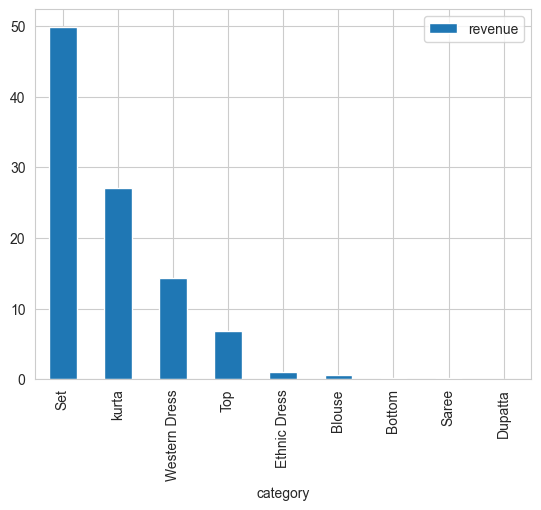

In [85]:
# Basic plot command
category_revenue.plot.bar();

For reference, here are the referred to styles (Kurta - right, Western dress - left):<br/>
 <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/kurta-vs-dress.png'>

### Analysis: Average Order Value by Category

Revenue alone doesn’t tell the full story. Some categories might generate fewer sales but have *higher order values*.

Let’s calculate **average revenue per order** (AOV) for each product category.

**You try it**

Tabulate and then plot the average order value per category.

You may want to produce something like this:

<center>
<img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch2.jpg' width='50%'>
</center>

If you have succeeded, you'll maybe notice that an interesting pattern emerges, let's overlay this with our previous plot:

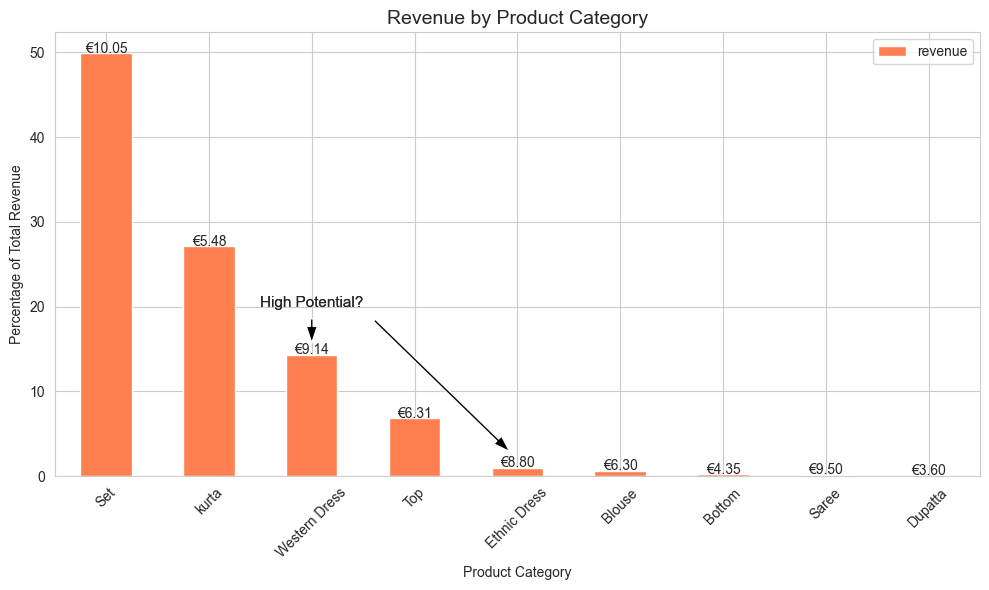

In [86]:
fig, ax = plt.subplots(figsize=(10,6))

bar_colors = ['green' if cat in ['Western Dress', 'Set'] else 'coral' for cat in category_revenue.index]

category_revenue.plot(kind='bar', color='coral', ax=ax)

for i, category in enumerate(category_revenue.index):
    avg_cost = df[df['category'] == category]['revenue'].mean()
    ax.text(i, category_revenue.values[i] +.1, f'€{avg_cost:.2f}', ha='center', fontsize=10)

ax.annotate(
    'High Potential?',
    xy=(2, 15),
    xytext=(2, 15 + 5),
    arrowprops=dict(facecolor='black', shrink=0.15, width=2, headwidth=8),
    ha='center',
    fontsize=11,
    fontweight='bold'
)
ax.annotate(
    'High Potential?',
    xy=(4, 2),
    xytext=(2, 20),
    arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
    ha='center',
    fontsize=11,
    fontweight='bold'
)


plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analysis: Product Portfolio Matrix

We can think of each product category as a portfolio element. High revenue = popularity. High AOV = profitability per sale. Plotting these gives us a clear 2x2 matrix for strategy.

<center>
<img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch3.jpg' width='50%'>
</center>

Recommendations:
* ❌ **Underperformers**: Consider retiring or repositioning 
* 📦 **Volume Drivers**: Focus on logistics, bundling, efficiency
* 🎯 **Niche Upside**: Test with promos or better visibility 
* ⭐ **Premium Performers**: Upsell, promote, ...

In [87]:
import matplotlib.pyplot as plt

# Calculate total revenue and AOV per category
category_metrics = df.groupby('category').agg(
    total_revenue   = ('revenue', 'sum'),
    avg_order_value = ('revenue', 'mean')
).reset_index()
category_metrics

,category,total_revenue,avg_order_value
0,Blouse,5406.66,6.301469
1,Bottom,1777.58,4.346161
2,Dupatta,10.80,3.600000
3,Ethnic Dress,9323.69,8.795934
4,Saree,1462.40,9.496104
5,Set,461950.82,10.046777
6,Top,63048.82,6.312457
7,Western Dress,132261.97,9.136007
8,kurta,250941.30,5.479546


**You try it**

Try to scatter plot the total revenue v.s. median order value. The command you'll use is `.plot.scatter(x=...,y=...)`.

Here's a fancy version, which assumes you have already calculated the correct avg order value :-)

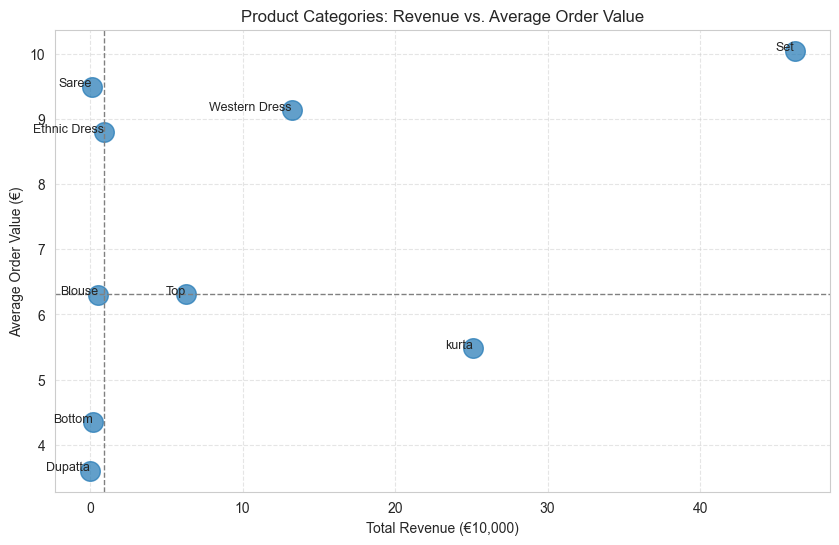

In [92]:
category_metrics = df.groupby('category').agg(
    total_revenue   = ('revenue', 'sum'),
    avg_order_value = ('revenue', 'mean'),
    median_order_value = ('revenue', 'median'),
).reset_index()
category_metrics

### Previous plot
# category_metrics.plot.scatter(
#    x='median_order_value', 
#    y='total_revenue', 
#    alpha=0.5, 
#    color='coral'
# );

#### Fancy scatter plot
category_metrics['revenue_10k'] = category_metrics['total_revenue'] / 10000

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    category_metrics['revenue_10k'],
    category_metrics['avg_order_value'],
    s=200, 
    alpha=0.7,
)

# Annotate each point with the category name
for _, row in category_metrics.iterrows():
    ax.text(row['revenue_10k'], row['avg_order_value'], row['category'], fontsize=9, ha='right')

# Add reference lines for median revenue and median AOV
median_revenue = category_metrics['revenue_10k'].median()
median_aov     = category_metrics['avg_order_value'].median()

ax.axhline(median_aov,     color='gray', linestyle='--', linewidth=1)
ax.axvline(median_revenue, color='gray', linestyle='--', linewidth=1)

# Titles and labels
ax.set(
    title='Product Categories: Revenue vs. Average Order Value',
    xlabel='Total Revenue (€10,000)',
    ylabel='Average Order Value (€)'
)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

Of course, we can also do this at the SKU level (which probably makes more sense for Amazon).

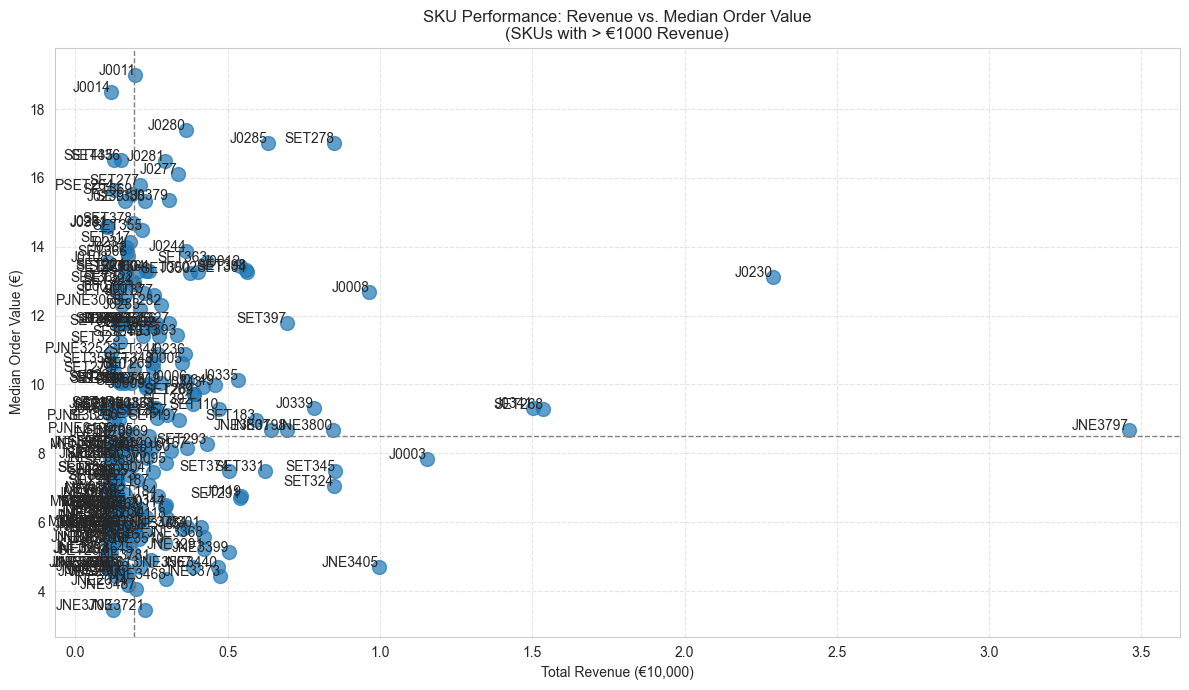

In [93]:
import matplotlib.pyplot as plt

# Calculate total revenue and AOV per SKU
sku_metrics = df.groupby('base-SKU').agg(
    total_revenue        = ('revenue', 'sum'),
    median_order_value   = ('revenue', 'median')
).reset_index()

sku_metrics = sku_metrics[sku_metrics['total_revenue'] > 1000]

# Scale revenue for plot readability
sku_metrics['revenue_10k'] = sku_metrics['total_revenue'] / 10000

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(
    sku_metrics['revenue_10k'],
    sku_metrics['median_order_value'],
    s=100, alpha=0.7
)

# Annotate each point with the SKU (shortened if necessary)
for _, row in sku_metrics.iterrows():
    label = str(row['base-SKU'])[:15]  # truncate if SKUs are long
    ax.text(row['revenue_10k'], row['median_order_value'], label, fontsize=10, ha='right')

# Add reference lines for medians
median_revenue = sku_metrics['revenue_10k'].median()
median_aov     = sku_metrics['median_order_value'].median()

ax.axhline(median_aov,     color='gray', linestyle='--', linewidth=1)
ax.axvline(median_revenue, color='gray', linestyle='--', linewidth=1)

# Titles and labels
ax.set(
    title='SKU Performance: Revenue vs. Median Order Value\n(SKUs with > €1000 Revenue)',
    xlabel='Total Revenue (€10,000)',
    ylabel='Median Order Value (€)'
)

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Here are the two interesting ones that come up:

<table style='text-align:center; vertical-align:top; font-weight:bold'>
 <tr>
  <td>
    J0230-SKD<br/>
   <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/amazon-J0230-SKD.jpg' width='50%'>
  </td>
  <td>
 JNE3797<br/>
   <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/amazon-JNE3797-KR.jpg' width='50%'>
  </td>
 </tr>
</table>

## State Dashboard

Let's say that you’re working as a data scientist or BI developer. The goal is often not just to analyze but rather to communicate insights clearly as we've been trying to do before. Sometimes a plot is enough, other times a dynamic dashboard is needed.

Dashboards allow business users (e.g., regional managers) to quickly:

* See how their region is doing
* Spot product trends
* Act on poor performance
* ..

We'll build a simple command-line dashboard first, and then make it interactive. We're working towards something like this that shows per-state statistics:

<center>
<img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch4.jpg' width='50%'>
</center>

Let's first look at the states:

In [125]:
df.ship_state.unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'GOA', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RJ', 'ORISSA', 'LAKSHADWEEP', 'PB',
       'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

Let's pick just one state to understand its sales profile. We'll start with Karnataka, one of the largest markets

In [121]:
# Filter data for Karnataka
karnataka = df[df['ship_state'] == 'KARNATAKA']

In [122]:
# Calculate the number of orders placed in this state
total_orders = len(karnataka)

# Calculate total revenue generated
total_revenue = karnataka['amount_eu'].sum()

# Average revenue per order — helps identify spending behavior
avg_order_value = karnataka['amount_eu'].mean()

# Find the most popular product category by quantity sold
top_category = (
    karnataka.groupby('category')['qty']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

# Print the summary stats
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: €{total_revenue:,.2f}")
print(f"Average Order Value: €{avg_order_value:,.2f}")
print(f"Top Category: {top_category.index[0]} ({top_category.values[0]} units)")

Total Orders: 16050
Total Revenue: €123,519.42
Average Order Value: €7.70
Top Category: kurta (6085 units)


**You try it**: write a dashboard function `draw_state_dashboard(state)` that takes as input a `state` and prints the above statistics.

**Dashboard**

Wonderful, all that is needed at this point is to make it interactive with a dropdown. Note: this code assumes that you are using a notebook like google collab or jupyter lab. Notably it won't work in VS Code.

Note: You will need to install and enable widgets, it doesn't always work on every environment.

In [ ]:
! pip install ipywidgets==8.0.2
! pip install jupyterlab_widgets==3.0.13

In [123]:
import ipywidgets as widgets
from IPython.display import display

def draw_state_dashboard(state):
    # Standardize input casing
    subset = df[df['ship_state'] == state.upper()]
    
    if subset.empty:
        print("No data for selected state.")
        return

    # Core KPIs
    total_orders = len(subset)
    total_revenue = subset['amount_eu'].sum()
    avg_order_value = subset['amount_eu'].mean()
    top_category = (
        subset.groupby('category')['qty']
        .sum()
        .sort_values(ascending=False)
        .head(1)
    )

    # Print the summary
    print(f"--- Dashboard for {state.title()} ---")
    print(f"Total Orders: {total_orders:,.0f}")
    print(f"Total Revenue: €{total_revenue:,.2f}")
    print(f"Average Order Value: €{avg_order_value:,.2f}")
    print(f"Top Category: {top_category.index[0]} ({top_category.values[0]} units)")
    return None

output          = widgets.Output()
state_dropdown  = widgets.Dropdown(
    options=sorted(df['ship_state'].dropna().unique()),
    description='Select a State:',
    style={'description_width': 'initial'}
)

def on_state_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        output.clear_output(wait=True)       # <-- correct clearing
        with output:
            draw_state_dashboard(change['new'])

state_dropdown.observe(on_state_change)
display(state_dropdown, output);


Dropdown(description='Select a State:', options=('ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'AR', 'ARUNACHAL PRADE…

Output()

### BONUS: add some analysis from before to make it prettier

Note: in production you will want to use plotly dash, which functions similar to what we've seen above. Here are a [couple of examples](https://plotly.com/examples/), and one for [Amazon](https://challenge-amazon.onrender.com/puchase_overview).

Dropdown(description='Select a State:', options=('ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'AR', 'ARUNACHAL PRADE…

Output()

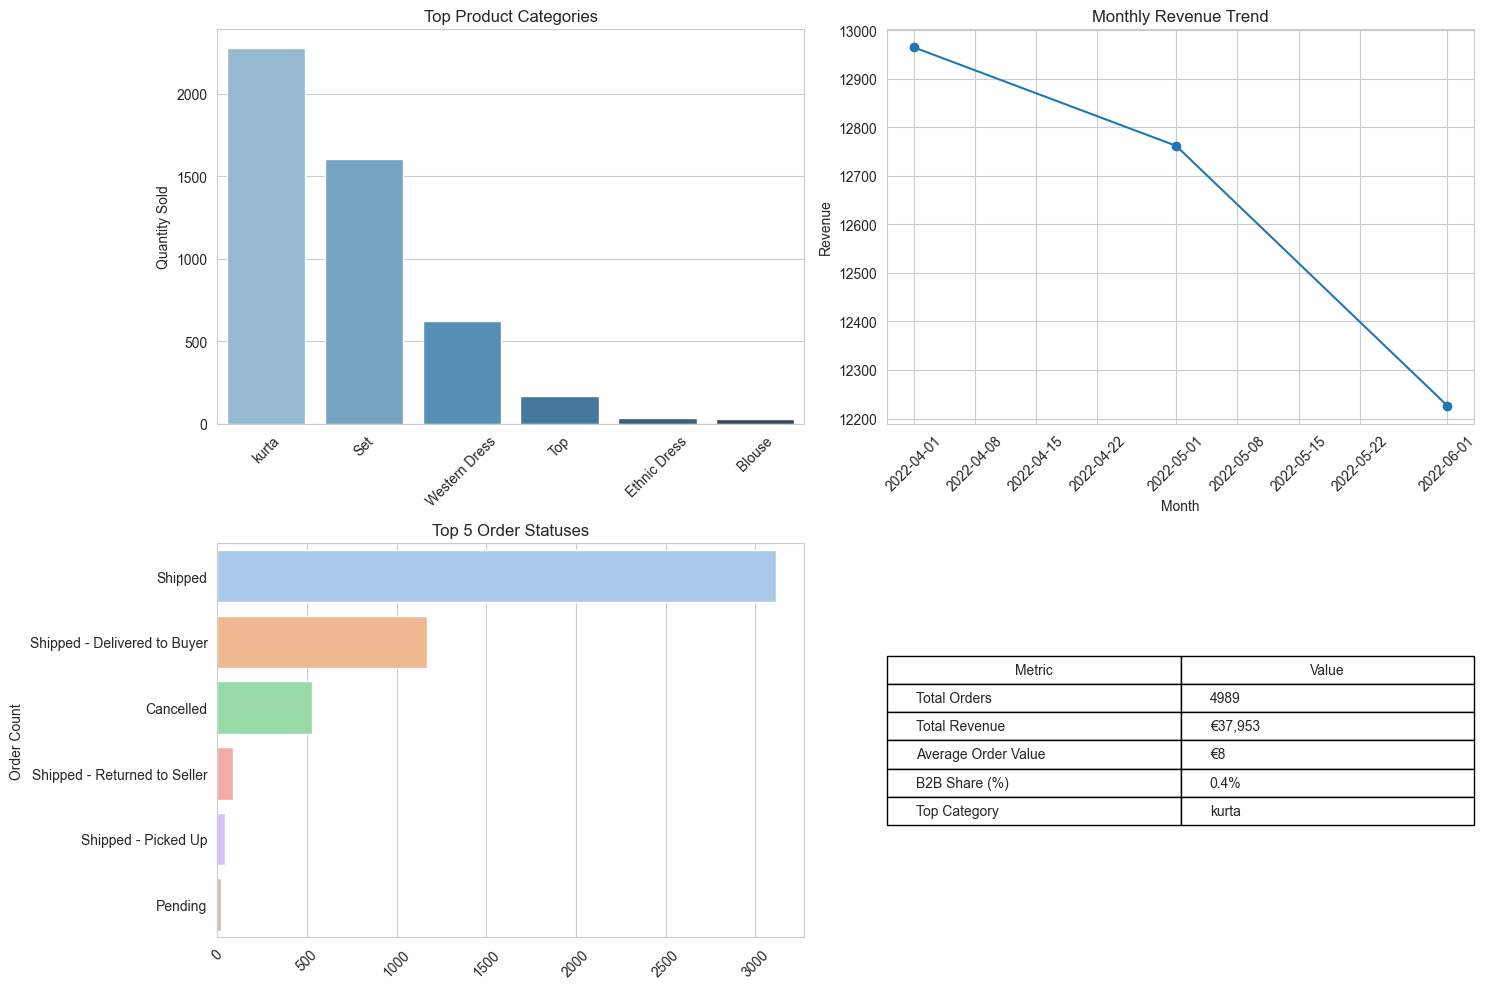

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define enhanced dashboard function
df['date'] = pd.to_datetime(df['date'])

def draw_state_dashboard(state):
    subset = df[df['ship_state'] == state.upper()]
    if subset.empty:
        print("No data for selected state.")
        return

    # Set up 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Pane 1: Bar plot of top categories
    top_cats = (subset.groupby('category')['qty']
                .sum()
                .sort_values(ascending=False)
                .head(6)
                .reset_index())
    sns.barplot(data=top_cats, x='category', y='qty', ax=axs[0, 0], palette='Blues_d', hue='category')
    axs[0, 0].set_title("Top Product Categories")
    axs[0, 0].set_ylabel("Quantity Sold")
    axs[0, 0].set_xlabel("")
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Pane 2: Monthly revenue trend
    monthly = (subset.groupby(subset['date'].dt.to_period('M'))['amount_eu']
               .sum()
               .sort_index())
    monthly.index = monthly.index.to_timestamp()
    axs[0, 1].plot(monthly.index, monthly.values, marker='o')
    axs[0, 1].set_title("Monthly Revenue Trend")
    axs[0, 1].set_ylabel("Revenue")
    axs[0, 1].set_xlabel("Month")
    axs[0, 1].tick_params(axis='x', rotation=45)
    
    # Pane 3: Order status breakdown as a bar plot
    status_counts = (subset['status']
                     .value_counts()
                     .head(6)
                     .sort_values(ascending=False)
                     .reset_index())
    
    sns.barplot(data=status_counts, y='status', x='count', ax=axs[1, 0], palette='pastel', hue='status', orient='h')
    
    axs[1, 0].set_title("Top 5 Order Statuses")
    axs[1, 0].set_ylabel("Order Count")
    axs[1, 0].set_xlabel("")
    axs[1, 0].tick_params(axis='x', rotation=45)


    # Pane 4: Show summary stats as table
    total_orders = len(subset)
    total_revenue = subset['amount_eu'].sum()
    avg_order_value = subset['amount_eu'].mean()
    b2b_share = subset['B2B'].mean() * 100
    top_category = top_cats.iloc[0]['category']
    summary_data = pd.DataFrame({
        'Metric': ['Total Orders', 'Total Revenue', 'Average Order Value', 'B2B Share (%)', 'Top Category'],
        'Value': [total_orders, f"€{total_revenue:,.0f}", f"€{avg_order_value:,.0f}", f"{b2b_share:.1f}%", top_category]
    })
    axs[1, 1].axis('off')
    table = axs[1, 1].table(cellText=summary_data.values,
                           colLabels=summary_data.columns,
                           cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.tight_layout()
    #plt.show() #<--- needs to be on in some environments

# UI Dropdown
output = widgets.Output()
state_dropdown = widgets.Dropdown(
    options=sorted(df['ship_state'].dropna().unique()),
    description='Select a State:',
    style={'description_width': 'initial'}
)

def on_state_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output(wait=True)
            draw_state_dashboard(change['new'])

state_dropdown.observe(on_state_change)
display(state_dropdown, output);

In [resources](https://github.com/ciri/iese-dsfb/tree/main/resources/amazon/dashboard) you'll find the full code to make an interactive dashboard based on the above functions using python.

# You try it: bonus analyses

Let us now think of a couple more interesting things to add to the dashboard. You can try your own or take inspiration from the examples below:

1. Cancelation / returns
2. Revenue per customer type (B2B vs regular) - over time?
3. ...


### Cancellations & Returns

Not all orders are good news. In e-commerce, cancellations and returns create serious operational and financial issues:
* Lost revenue: These orders don’t convert into sales.
* Shipping and handling costs: Often non-refundable.
* Reverse logistics: Costly and time-consuming.
* Chargebacks: Especially if customers dispute transactions.
* Fraud & abuse: Repeated returns or B2C-to-B2B loopholes.
* Money laundering flags: In some cases, abnormal return behavior is a red flag.

Long story short: cancellations and returns hurt revenue.

Let’s measure the size of the problem:

* How many orders were cancelled?
* How many were returned?
* What percentage of total orders does this represent?

So far, you’ve used `.groupby()` for totals and averages. This time let’s introduce `.value_counts()` which is a quick way to count categories in one column, like a faster `.groupby('status').shape`.

**Enric's solution**

I start by thinking how I will visualize this. I'm usually not a fan of pie charts (hard to cognitively process proportions from angles), but given that we have so many barcharts on the dashboard I think it will add some visual appeal.

Maybe something like this in the Amazon colors?

<center>
  <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch5.jpg' width='50%'>
</center>

Let's go!

status
Shipped                          75940
Shipped - Delivered to Buyer     28029
Cancelled                        10756
Shipped - Returned to Seller      1949
Shipped - Picked Up                945
Pending                            639
Pending - Waiting for Pick Up      272
Shipped - Returning to Seller      143
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64
=====
Cancelled Orders: 10756 (9.06%)
Returned Orders: 1949 (1.64%)
Total Problematic Orders: 10.70%
=====


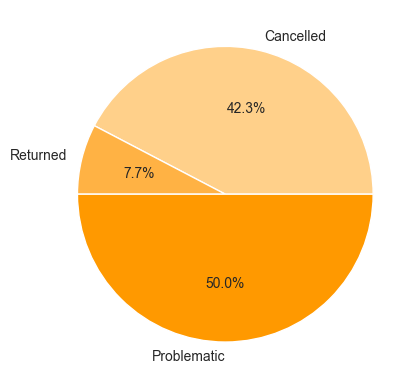

In [135]:
# Step 1: Count all status values
# ---> same as: df.groupby('status').size().sort_values(ascending=False)
print(df['status'].value_counts() )

# Step 2: Filter for problematic orders (cancelled or returned)
cancelled = df[df['status'] == 'Cancelled']
returned  = df[df['status'] == 'Shipped - Returned to Seller']

# Step 3: Calculate totals and percentages
total_orders    = df.shape[0]
cancelled_pct   = cancelled.shape[0] / total_orders * 100
returned_pct    = returned.shape[0] / total_orders * 100
problematic_pct = (cancelled.shape[0]  + returned.shape[0]) / total_orders * 100

print("=====")
print(f"Cancelled Orders: {len(cancelled)} ({cancelled_pct:.2f}%)")
print(f"Returned Orders: {len(returned)} ({returned_pct:.2f}%)")
print(f"Total Problematic Orders: {problematic_pct:.2f}%")


print("=====")
plt.pie(
    [len(cancelled), len(returned), len(cancelled) + len(returned)],
    labels=['Cancelled', 'Returned', 'Problematic'],
    colors=['#FFD08A', '#FFB244', '#FF9900'],
    autopct='%1.1f%%'
)
plt.show()


> Observations: High cancellation rates (churn?), high return rates (issues with quality or fit? need to figure this out to avoid expensive logistics).

### Revenue by Customer Type (B2B vs. Regular)

Amazon doesn’t just sell to everyday consumers — it also serves **business buyers** through **Amazon Business**.

| **Customer Type** | **Examples**                                      | **What They Value**                                |
|--------------------|---------------------------------------------------|----------------------------------------------------|
| Regular (B2C)       | Individual shoppers buying for personal use      | Price, fast shipping, product variety              |
| Business (B2B)      | SMEs, schools, retailers buying in bulk          | Discounts, tax invoices, delivery reliability, APIs|

Business customers usually spend more per order — but place fewer orders.  
Regular customers are more frequent, but each transaction is smaller.

To understand these channels better, let us look at some stats:
1. Total revenue by customer type  
2. Average order value (AOV) by customer type  
3. Number of orders by customer type

In [136]:
# Step 1: Group by customer type and summarize metrics
customer_summary = df.groupby('B2B').agg(
    total_revenue   = ('amount_eu', 'sum'),
    avg_order_value = ('amount_eu', 'mean'),
    order_count     = ('order_id', 'count')
).reset_index()
customer_summary

,B2B,total_revenue,avg_order_value,order_count
0,False,919207.39,7.797691,117882
1,True,6976.65,8.275979,843


In [137]:
# Step 2: Convert True/False to readable labels
customer_summary['B2B'] = customer_summary['B2B'].replace({True: 'B2B', False: 'B2C'})
customer_summary

,B2B,total_revenue,avg_order_value,order_count
0,B2C,919207.39,7.797691,117882
1,B2B,6976.65,8.275979,843


**Observations**:

| **Metric**         | **What It Shows**                                                                                |
|--------------------|--------------------------------------------------------------------------------------------------|
| **Order Count** | Regular customers dominate volume — this is the bulk of the business                            |
| **AOV**         | Business customers spend **~8% more per order** (€7.71 vs €7.13) but much less than expected.                                  |
| **Total Revenue** | Business is currently a *tiny slice* of total revenue (~0.75%) — but with higher ticket size |

Potential actionable insight: one last attempt at invigorating and attracting better B2B through e.g. exclusive deals, bulk pricing, repeate order flows? If it doesn't work we may consider spinning off or integrating it into B2C.

For our dashboard instead of a one-shot metric, I think I want a more dynamic graph over time, perhaps something like this:

<center>
  <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/amazon/sketch6.jpg' width='50%'>
</center>

First order of business will be to add-in time. You do this by grouping by 2 columns simultaneously.

In [170]:
monthly = df.groupby(['month','B2B']).agg(
    total_revenue   = ('amount_eu','sum'),
    avg_order_value = ('amount_eu','mean'),
    order_count     = ('order_id','count')
).reset_index()
monthly['B2B'] = monthly['B2B'].replace({True: 'B2B', False: 'B2C'})
monthly

,month,B2B,total_revenue,avg_order_value,order_count
0,April,B2C,337543.60,7.514160,44921
1,April,B2B,2767.35,8.211721,337
2,June,B2C,274420.20,7.972001,34423
3,June,B2B,1988.83,8.463106,235
4,May,B2C,307243.59,7.972484,38538
5,May,B2B,2220.47,8.193616,271


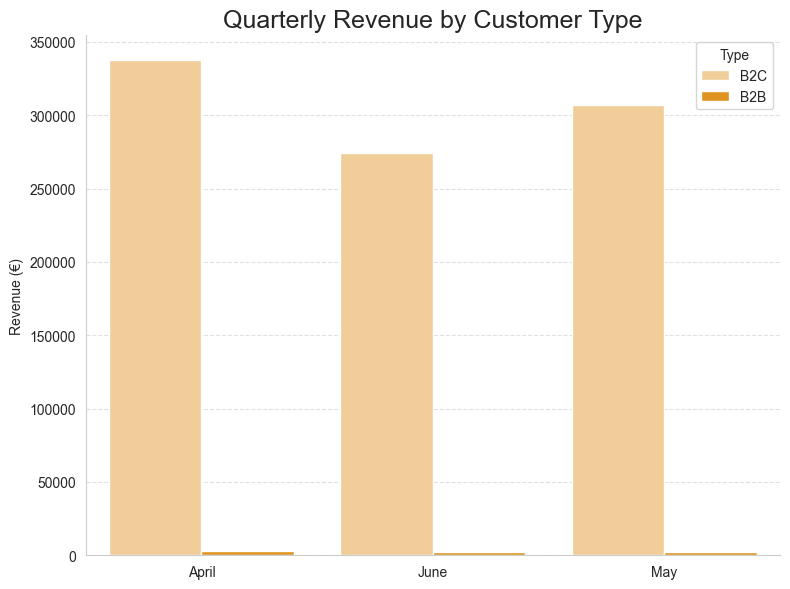

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))

palette = ['#FFD08A', '#FF9900']   # B2C light, B2B dark

sns.barplot(
    data=monthly,
    x='month',
    y='total_revenue',
    hue='B2B',
    palette=palette,
    ax=ax
)

ax.set_title("Quarterly Revenue by Customer Type", fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel("Revenue (€)")

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Type')
plt.tight_layout()
plt.show()


Not as informative as I would have hoped. If we want to compare trends perhaps we should give each its own y axis ...

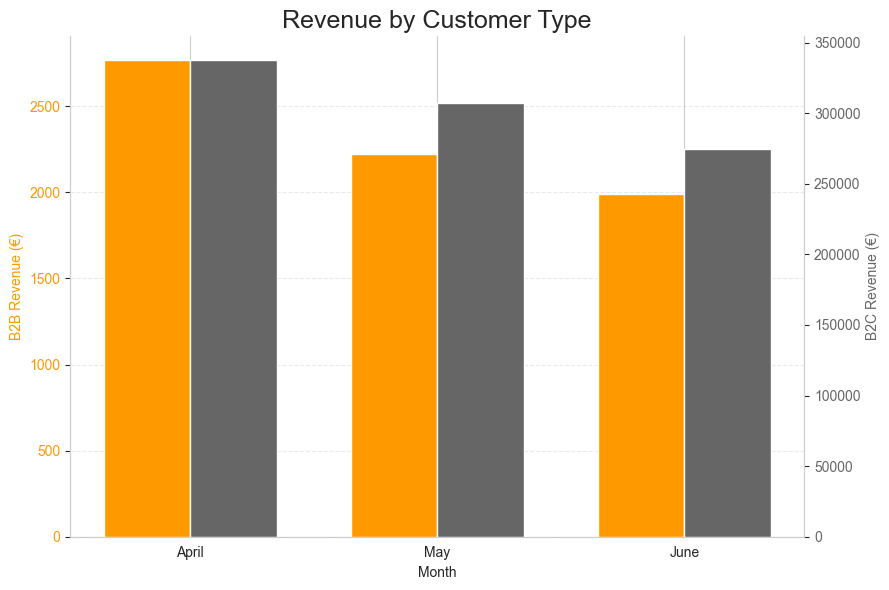

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set_style('whitegrid')

# Split data
b2b_true  = monthly[monthly['B2B'] == 'B2B']
b2b_false = monthly[monthly['B2B'] == 'B2C']

# Reorder months if needed
order = ["April", "May", "June"]
b2b_true  = b2b_true.set_index('month').reindex(order).reset_index()
b2b_false = b2b_false.set_index('month').reindex(order).reset_index()


# Plot data
months     = b2b_true['month'].astype(str)
x          = np.arange(len(months))
width      = 0.35

b2b_vals   = b2b_true['total_revenue'].values
b2c_vals   = b2b_false['total_revenue'].values



fig, ax1 = plt.subplots(figsize=(9,6))

# --- LEFT AXIS (B2B) ---
b2b_bars = ax1.bar(
    x - width/2,
    b2b_vals,
    width,
    color='#FF9900',
    label='B2B'
)

ax1.set_ylabel('B2B Revenue (€)', color='#FF9900')
ax1.tick_params(axis='y', labelcolor='#FF9900')
ax1.spines['top'].set_visible(False)

# --- RIGHT AXIS (B2C) ---
ax2 = ax1.twinx()

b2c_bars = ax2.bar(
    x + width/2,
    b2c_vals,
    width,
    color='#666666',
    label='B2C'
)

ax2.set_ylabel('B2C Revenue (€)', color='#666666')
ax2.tick_params(axis='y', labelcolor='#666666')
ax2.spines['top'].set_visible(False)

# --- X-axis ---
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.set_xlabel("Month")

# --- Clean grid only for left axis ---
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax2.grid(False)

# --- Title ---
plt.title("Revenue by Customer Type", fontsize=18)

plt.tight_layout()
plt.show()


Credits: original data source from [here](https://data.world/anilsharma87).